In [1]:
## Mounting of Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Loading Text data
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/George Floyd Twitter Data.csv", encoding = 'ISO-8859-1')
dataset.head()

,Unnamed: 0,text
0,0,The truth is IN YOUR FACE. Don't look away!\n#...
1,1,@WomenNMedia @TheWrap @sharonwaxman Sorry to s...
2,2,Former Vice President Joe Biden made a touchin...
3,3,@MSNBC Just couple of days back #GeorgeFloydFu...
4,4,We know you went to Dallas because #GeorgeFloy...


In [3]:
from wordcloud import WordCloud
from textwrap import wrap
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)



the                        82
#GeorgeFloydFuneral        76
a                          65
of                         64
to                         55
                           ..
#chicagoriots               1
Website                     1
#NewGeneration              1
sparks                      1
https://t.co/HGZswSJpLi     1
Length: 1696, dtype: int64

In [4]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [5]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"you're", 'herself', 'their', 'against', 'both', "won't", "shan't", 'off', 'since', 'your', 'get', "don't", "shouldn't", 'a', 'am', "they'd", 'above', "we'd", 'does', 'being', 'but', "i'll", 'any', 'where', "they'll", 'an', "weren't", 'my', 'what', "we're", 'they', 'because', "where's", 'you', "how's", 'then', 'by', 'ours', 'as', 'hers', 'been', 'have', "he'll", 'why', 'we', 'yourself', "aren't", 'so', 'are', "they've", 'which', "who's", 'www', 'theirs', 'over', 'her', 'few', 'other', "you've", "she'll", 'if', 'such', 'each', 'after', 'out', "i'd", 'here', 'until', 'some', "hasn't", 'would', 'otherwise', 'yourselves', 'his', 'under', 'when', "i've", "you'd", 'ourselves', 'again', 'myself', "let's", "she'd", "wouldn't", "haven't", 'i', 'or', 'its', 'not', "that's", "they're", "couldn't", "what's", 'me', 'at', 'below', 'do', 'from', 'k', 'nor', "when's", 'too', 'whom', 'itself', 'there', 'and', 'own', 'was', 'be', 'ever', 'could', 'same', "can't", 'just', "she's", 'did', 'doing', 'durin

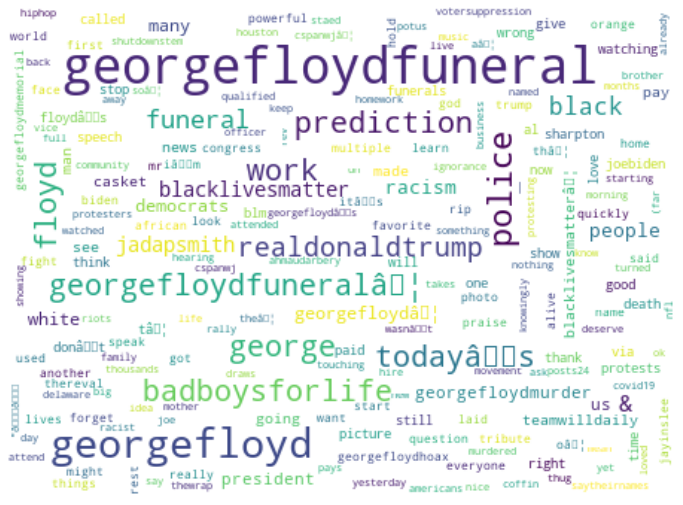

In [6]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

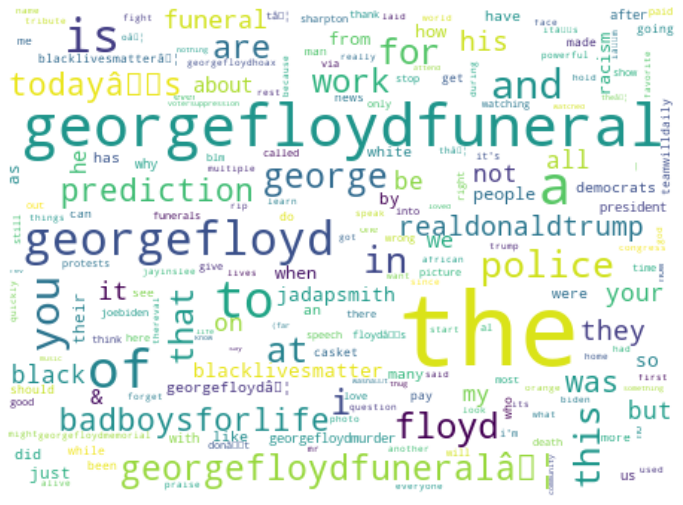

In [7]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100


#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
##def generate_wordcloud(dataset,text):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

IndentationError: ignored

In [ ]:
## import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text